# SI 618 Homework 5 - Natural Language Processing

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. Questions 1 through 6 are worth 10 points each; Question 7 is worth 20 points.

Version 2024.02.20.CT

## Background

https://www.kaggle.com/headsortails/us-election-2020-presidential-debates

The US 2020 election saw the incumbent Republican president Donald Trump facing off against his Democrat challenger Joe Biden. Both candidates agreed to debate their political stances in the lead-up to the vote on November 3rd.

The 1st debate took place on September 29th at Case Western Reserve University in Cleveland, Ohio. It was moderated by Fox News anchor Chris Wallace. 

After Donald Trump tested positive for Covid-19 after his first debate and subsequently recovered, the 2nd presidential debate was initially converted into a virtual event. However, Trump declined to participate in a virtual debate and the event was transformed into a (socially distanced) town hall with Joe Biden alone. This event was moderated by George Stephanopoulos on the ABC network and took place on October 15th. Donald Trump then decided to hold a town hall of his own, which took place at the same day and time as the Biden town hall and was aired on NBC. This event was moderated by Savannah Guthrie.

The actual 2nd, and final, presidential debate between Biden and Trump took place on October 22nd at Belmont University, Nashville, Tennessee and was moderated by NBC News' Kristen Welker. This debate implemented stricter conditions on the candidates' speaking times to limit the frequent interruptions that had characterised the 1st debate.

The goal of this homework assignment is to investigate the transcripts of those events.

The data files are available via https://github.com/umsi-data-science/data/tree/main/us_election_2020.  Note that each file is available in two formats: CSV and TXT. You can work from either format -- the content of the corresponding CSV and TXT files is the same.

You can either use the correct URLs to the Raw version of the data files like we've done with other data files in the course so far, you can clone the repo if you're comfortable with ```git```, or you can click on each file and then view the "Raw" format and download the resulting file.  You do not need the us_election_2020_vice_presidential_debate files as we are only concerned with the presidential debates and town halls for this assignment.

Note that *you* will need to make decisions about how you
proceed with the analysis.  For example, you will need to 
decide whether you include or omit stopwords, whether you stem or lemmatize words before analysis, and how you handle weird situations.

You will need to decide when to exclude speech from the moderators and when to include it (note that in most cases, the assignment asks about the candidates, which means Trump and Biden and not the moderators).

Please fill in your uniqname in the next code cell:

In [453]:
MY_UNIQNAME = "aanaa"

Answer each of the questions below.  You are encouraged to use as many code and markdown cells as you need for each question.

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

## Q1.

### How many words did each candidate (Trump & Biden) use in each debate?

In [454]:
import pandas as pd
import numpy as np
import contractions
import re
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [455]:
trump = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_trump_town_hall.csv")
biden = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_biden_town_hall.csv")
first_debate = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_1st_presidential_debate.csv")
second_debate = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/us_election_2020_2nd_presidential_debate.csv")

In [456]:
first_debate.head()

,speaker,minute,text
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...
1,Chris Wallace,02:10,This debate is being conducted under health an...
2,Vice President Joe Biden,02:49,"How you doing, man?"
3,President Donald J. Trump,02:51,How are you doing?
4,Vice President Joe Biden,02:51,I’m well.


In [457]:
second_debate.speaker.value_counts()

Donald Trump      190
Kristen Welker    189
Joe Biden         133
Name: speaker, dtype: int64

### Removing contractions from the text and performing tokenization of the text.

### Remove punctuation from the text.

### Remove stopwords from the text

I'll do removing contractions, punctuations, stop words then count words before tokenzize.

### Lemmatization of the text

In [458]:
from spacy.lang.en.stop_words import STOP_WORDS

# Q1

In [459]:
# get all words for trump and biden in the first debate and second debate, then make it to sentences
trump_first_debate = first_debate.text[first_debate['speaker'] == 'President Donald J. Trump']
trump_first_debate = trump_first_debate.str.cat(sep=' ')

biden_first_debate = first_debate.text[first_debate['speaker'] == 'Vice President Joe Biden']
biden_first_debate = biden_first_debate.str.cat(sep=' ')

trump_second_debate = second_debate.text[second_debate['speaker'] == 'Donald Trump']
trump_second_debate = trump_second_debate.str.cat(sep=' ')

biden_second_debate = second_debate.text[second_debate['speaker'] == 'Joe Biden']
biden_second_debate = biden_second_debate.str.cat(sep=' ')

In [460]:
# lower the sentences
trump_first_debate_lower = trump_first_debate.lower()
biden_first_debate_lower = biden_first_debate.lower()
trump_second_debate_lower = trump_second_debate.lower()
biden_second_debate_lower = biden_second_debate.lower()

In [461]:
# remove contractions
def remove_con(text):
    expanded_text = []
    for word in text.split():
        expanded_text.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_text)
    return expanded_text

In [462]:
# remove contractions
trump_first_debate_no_con = remove_con(trump_first_debate_lower)
biden_first_debate_no_con = remove_con(biden_first_debate_lower)
trump_second_debate_no_con = remove_con(trump_second_debate_lower)
biden_second_debate_no_con = remove_con(biden_second_debate_lower)

In [463]:
# remove special characters
trump_first_debate_clean = re.sub(r'[^\w\s]+', ' ', trump_first_debate_no_con)
biden_first_debate_clean = re.sub(r'[^\w\s]+', ' ', biden_first_debate_no_con)
trump_second_debate_clean = re.sub(r'[^\w\s]+', ' ', trump_second_debate_no_con)
biden_second_debate_clean = re.sub(r'[^\w\s]+', ' ', biden_second_debate_no_con)

In [464]:
# words counts
print(f"Words count for Trump in first debate: {len(trump_first_debate_clean.split())}")
print(f"Words count for Biden in first debate: {len(biden_first_debate_clean.split())}")
print(f"Words count for Trump in second debate: {len(trump_second_debate_clean.split())}")
print(f"Words count for Biden in second debate: {len(biden_second_debate_clean.split())}")

Words count for Trump in first debate: 7677
Words count for Biden in first debate: 6980
Words count for Trump in second debate: 7984
Words count for Biden in second debate: 7558


In [465]:
# remove stop words
def remove_stop(text):
    words = text.split()
    words_no_stopwords = list()
    for word in words:
        if word not in STOP_WORDS:
            words_no_stopwords.append(word)
    return words_no_stopwords

In [466]:
# remove stop words
trump_first_debate_no_stop = remove_stop(trump_first_debate_clean)
biden_first_debate_no_stop = remove_stop(biden_first_debate_clean)
trump_second_debate_no_stop = remove_stop(trump_second_debate_clean)
biden_second_debate_no_stop = remove_stop(biden_second_debate_clean)

In [467]:
trump_first_debate_no_stop = ' '.join(trump_first_debate_no_stop)
biden_first_debate_no_stop = ' '.join(biden_first_debate_no_stop)
trump_second_debate_no_stop = ' '.join(trump_second_debate_no_stop)
biden_second_debate_no_stop = ' '.join(biden_second_debate_no_stop)

In [468]:
nlp = spacy.load("en_core_web_sm")

def get_token(text):
    doc = nlp(text)
    return doc

In [469]:
# get tokenized words
trump_first_debate_token = get_token(trump_first_debate_no_stop)
biden_first_debate_token = get_token(biden_first_debate_no_stop)
trump_second_debate_token = get_token(trump_second_debate_no_stop)
biden_second_debate_token = get_token(biden_second_debate_no_stop)

In [470]:
# def get_pos(text):
#     print("text\tidx\tlemma\tlower\tpunct\tspace\tstop\tshape\tPOS")
#     for token in text:
#         if token.is_space:
#             print("SPACE")
#         else:
#             print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
#                 token.text,
#                 token.idx,
#                 token.lemma_,
#                 token.lower_,
#                 token.is_punct,
#                 token.is_space,
#                 token.is_stop,
#                 token.shape_,
#                 token.pos_
#         ))
def get_pos(text):
    doc = nlp(text)
    pos = [(X.text, X.label_) for X in doc.ents]
    return pos

In [471]:
trump_first_debate_pos = get_pos(trump_first_debate_no_stop)
trump_first_debate_pos

[('chris', 'PERSON'),
 ('senate', 'ORG'),
 ('white house', 'ORG'),
 ('notre dame', 'PERSON'),
 ('democrats', 'NORP'),
 ('chris thank joe million', 'ORG'),
 ('ginsburg', 'PERSON'),
 ('10 years ago', 'DATE'),
 ('senate', 'ORG'),
 ('years', 'DATE'),
 ('years', 'DATE'),
 ('years', 'DATE'),
 ('senate', 'ORG'),
 ('years', 'DATE'),
 ('years', 'DATE'),
 ('joe million', 'PERSON'),
 ('180 million', 'CARDINAL'),
 ('healthcare', 'ORG'),
 ('joe know', 'PERSON'),
 ('joe 308 000', 'PRODUCT'),
 ('200 million', 'CARDINAL'),
 ('china', 'GPE'),
 ('europe', 'LOC'),
 ('joe', 'PERSON'),
 ('million', 'CARDINAL'),
 ('chris', 'PERSON'),
 ('joe', 'PERSON'),
 ('80', 'CARDINAL'),
 ('47 year', 'DATE'),
 ('joe', 'PERSON'),
 ('bernie sanders far', 'PERSON'),
 ('days', 'DATE'),
 ('tuesday', 'DATE'),
 ('joe liar', 'PERSON'),
 ('joe listen agreed', 'PERSON'),
 ('bernie', 'PERSON'),
 ('00', 'CARDINAL'),
 ('15 10', 'CARDINAL'),
 ('chris', 'PERSON'),
 ('supreme court', 'ORG'),
 ('joe', 'PERSON'),
 ('47 years', 'DATE'),
 (

In [529]:
biden_first_debate_pos = get_pos(biden_first_debate_no_stop)
trump_second_debate_pos = get_pos(trump_second_debate_no_stop)
biden_second_debate_pos = get_pos(biden_second_debate_no_stop)

AttributeError: 'list' object has no attribute 'head'

In [474]:
# lemmatization
def get_lemma(text):
    lemmas = []
    for token in text:
        lemmas.append(token.lemma_)
    return lemmas

In [475]:
# lemmatization
trump_first_debate_lemma = get_lemma(trump_first_debate_token)
biden_first_debate_lemma = get_lemma(biden_first_debate_token)
trump_second_debate_lemma = get_lemma(trump_second_debate_token)
biden_second_debate_lemma = get_lemma(biden_second_debate_token)

In [476]:
trump_first_debate_lemma[0:10]

['thank',
 'chris',
 'tell',
 'simply',
 'win',
 'election',
 'election',
 'consequence',
 'senate',
 'white']

## 2. How many turns speaking did each candidate (Trump & Biden) take during each of the debates?

A "turn" is an uninterrupted period of speech.  For example, consider the following exchange:

>Chris: Big data is really interesting.

>Colleague: Actually, it's a bit boring.

>Chris: Really? Why would you say that?

>Colleague: Your choice of tools is really limited.

>Colleague: I mean, you're basically stuck with Spark, right?

>Chris: Yeah, but Spark provides most of the functionality you need to do really cool data science work.

In it, Chris had 3 turns, while his colleague had 2.

You answer should include a dataframe that looks like with the real values instead of $'\_'$:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>First Debate</th>
      <th>Second Debate</th>
    </tr>
    <tr>
      <th>Candidate</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Trump</th>
      <td>__</td>
      <td>__</td>
    </tr>
    <tr>
      <th>Biden</th>
      <td>__</td>
      <td>__</td>
    </tr>
  </tbody>
</table>
</div>

In [477]:
# filter trump and biden
first_debate_trump_biden = first_debate[first_debate['speaker'].isin(['President Donald J. Trump', 'Vice President Joe Biden'])]
second_debate_trump_biden = second_debate[second_debate['speaker'].isin(['Donald Trump', 'Joe Biden'])]


In [478]:
# lower the sentence
first_debate['text_lower'] = first_debate['text'].str.lower()
second_debate['text_lower'] = second_debate['text'].str.lower()
# remove contractions
first_debate['text_no_con'] = first_debate['text_lower'].apply(remove_con)
second_debate['text_no_con'] = second_debate['text_lower'].apply(remove_con)
# remove special characters
first_debate['text_clean'] = first_debate['text_no_con'].apply(lambda x: re.sub(r'[^\w\s]+', ' ', x))
second_debate['text_clean'] = second_debate['text_no_con'].apply(lambda x: re.sub(r'[^\w\s]+', ' ', x))

# tokenization
first_debate['text_token'] = first_debate['text_clean'].apply(get_token)
second_debate['text_token'] = second_debate['text_clean'].apply(get_token)


In [479]:
# Count the number of speaking turns for each speaker
def speaking_turns(df, speaker: list):
    duplicates_mask = df.eq(df.shift())
    df_filtered = df[~duplicates_mask]
    return pd.DataFrame(df_filtered).value_counts()

In [480]:
speaker1 = ['President Donald J. Trump', 'Vice President Joe Biden', 'Chris Wallace']    
first_turns = speaking_turns(first_debate['speaker'], speaker1)
print(first_turns)
speaker2 = ['Donald Trump', 'Joe Biden', 'Kristen Welker']   
second_turns = speaking_turns(second_debate['speaker'], speaker2)
print(second_turns)


speaker                  
President Donald J. Trump    305
Vice President Joe Biden     240
Chris Wallace                222
Chris Wallace:                 1
dtype: int64
speaker       
Kristen Welker    185
Donald Trump      169
Joe Biden         113
dtype: int64


How many turns speaking did each candidate (Trump & Biden) take during each of the debates?

In [481]:
turns_df = pd.DataFrame({
    'First Debate': [first_turns[0],first_turns[1]],
    'Second Debate': [second_turns[1],second_turns[2]]}, index = ['Trump', 'Biden'])

turns_df

,First Debate,Second Debate
Trump,305,169
Biden,240,113


## 3. How many different nouns did each candidate (Trump & Biden) use in each of the debates?  

Present your results using a visualization (hint: a simple bar chart, with one bar per candidate per debate would be a good choice; you should decide whether you want to somehow stack or group the bars in your bar chart, or just leave them all side by side). You do not need to report **which** nouns were used.  Provide a written interpretation of your visualization.

With Stop Words

In [521]:
trump_1 = first_debate_trump_biden[first_debate_trump_biden['speaker'] == 'President Donald J. Trump']

biden_1 = first_debate_trump_biden[first_debate_trump_biden['speaker'] == 'Vice President Joe Biden']
trump_2 = second_debate_trump_biden[second_debate_trump_biden['speaker'] == 'Donald Trump']
biden_2 = second_debate_trump_biden[second_debate_trump_biden['speaker'] == 'Joe Biden']


In [483]:
# get all nouns 
def get_noun(text):
    text = nlp(text)
    nouns = []
    for token in text:
        if token.pos_ == 'NOUN':
            nouns.append(token.text)
    return nouns

In [484]:
from collections import Counter

In [485]:
first_debate_trump_biden = first_debate[first_debate['speaker'].isin(['President Donald J. Trump', 'Vice President Joe Biden'])]
second_debate_trump_biden = second_debate[second_debate['speaker'].isin(['Donald Trump', 'Joe Biden'])]

In [486]:
# trump in first debate unique nouns
# first find all the nouns
# then use Counter to count the frequency of each noun
# then use len to count the number of unique nouns
t1 = get_noun(trump_first_debate_no_con)
t1
Counter(t1)
len(Counter(t1))

412

In [487]:
# trump in second debate unique nouns
t2 = get_noun(trump_second_debate_no_con)
t2
Counter(t2)
len(Counter(t2))

425

In [488]:
# biden in first debate unique nouns
b1 = get_noun(biden_first_debate_no_con)
b1
Counter(b1)
len(Counter(b1))

445

In [489]:
# biden in second debate unique nouns
b2 = get_noun(biden_second_debate_no_con)
b2
Counter(b2)
len(Counter(b2))

506

In [490]:
nouns_df = pd.DataFrame({
    'Debate': ['First Debate','First Debate', 'Second Debate', 'Second Debate'],
    'Speaker': ['Trump', 'Biden', 'Trump', 'Biden'],
    'Unique_nouns': [len(Counter(t1)),len(Counter(b1)),len(Counter(t2)),len(Counter(b2))]
    })

nouns_df

,Debate,Speaker,Unique_nouns
0,First Debate,Trump,412
1,First Debate,Biden,445
2,Second Debate,Trump,425
3,Second Debate,Biden,506


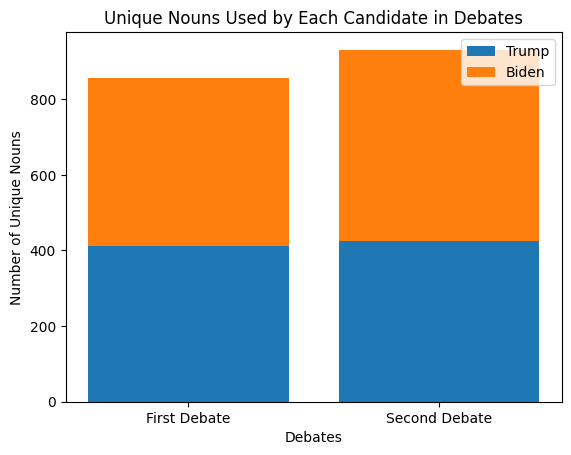

In [491]:
# Visualization
fig, ax = plt.subplots()
debates = ['First Debate', 'Second Debate']
trump = [len(Counter(t1)), len(Counter(t2))]
biden = [len(Counter(b1)), len(Counter(b2))]
ax.bar(debates, trump, label='Trump')
ax.bar(debates, biden, bottom=trump, label='Biden')

ax.set_xticks(range(len(debates)))
ax.set_xticklabels(debates)
ax.set_xlabel('Debates')
ax.set_ylabel('Number of Unique Nouns')
ax.set_title('Unique Nouns Used by Each Candidate in Debates')
ax.legend()

plt.show()

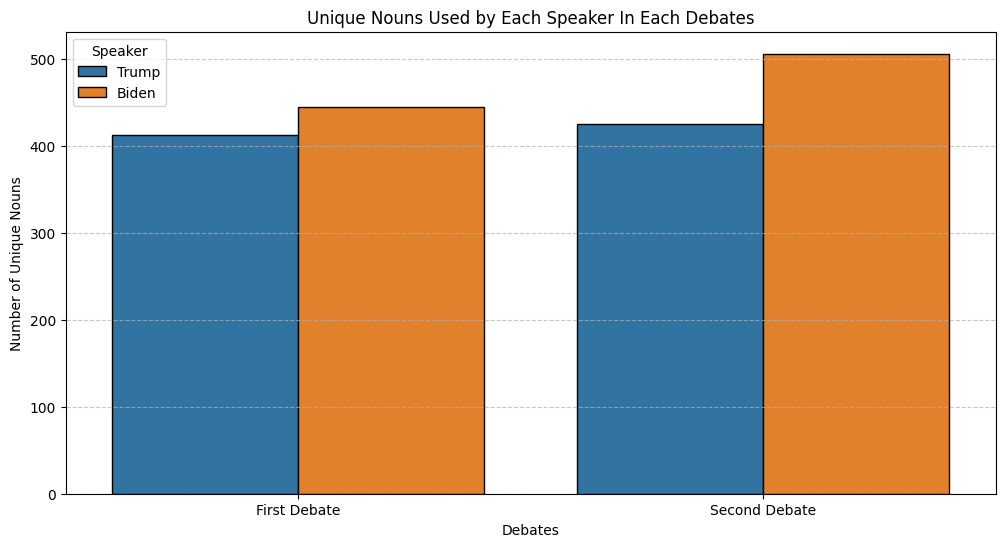

In [492]:
# plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=nouns_df,
            x="Debate", y="Unique_nouns",
            hue="Speaker", edgecolor="black")
plt.title("Unique Nouns Used by Each Speaker In Each Debates")
plt.ylabel("Number of Unique Nouns")
plt.xlabel("Debates")
plt.legend(title="Speaker")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. Report the type-token ratio for each of the candidates (Trump & Biden), based on pooling the data from the two debates, and interpret the differences between the two candidates.

In text analysis, a 'type' is a unique word, whereas a 'token' is any word.  For example, the sentence

"One fish, two fish, red fish, blue fish"

contains 8 tokens, but 5 types (one, two, red, blue, fish).

Interestingly, the type-token ratio can be used to monitor changes in the use of vocabulary items in children with under-developed vocabulary and/or word finding difficulties and, for example, in adults who have suffered a stroke and who consequently exhibit word retrieval difficulties and naming difficulties. [Ref](https://www.sltinfo.com/type-token-ratio/)

In [493]:
trump_df = trump_1.append(trump_2, ignore_index=True)
biden_df = biden_1.append(biden_2, ignore_index=True)

/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_12715/1980279033.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trump_df = trump_1.append(trump_2, ignore_index=True)
/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_12715/1980279033.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  biden_df = biden_1.append(biden_2, ignore_index=True)


In [494]:
# trump_debate = trump_first_debate_clean + trump_second_debate_clean
trump_debate = trump_first_debate_clean + trump_second_debate_clean
biden_debate = biden_first_debate_clean + biden_second_debate_clean

In [495]:
trump_debate = ' '.join(trump_debate.split())
biden_debate = ' '.join(biden_debate.split())

In [496]:
# calculate type-token ratio
def get_ttr(text):
    text = nlp(text)
    tokens = [token.text for token in text]
    return len(set(tokens))/len(tokens)



In [497]:
trump_ttr = get_ttr(trump_debate)
print("Trump's Type Token Ratio is:", trump_ttr)

Trump's Type Token Ratio is: 0.10540075240706498


In [498]:
biden_ttr = get_ttr(biden_debate)
print("Biden's Type Token Ratio is:", biden_ttr)

Biden's Type Token Ratio is: 0.1267431476265714


The type-token ratio (TTR) is a measure of lexical diversity within a given text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens). A higher TTR indicates greater lexical diversity, suggesting that the speaker uses a wider range of vocabulary. Conversely, a lower TTR suggests a more limited vocabulary or repetitive use of the same words.


Trump's Type-Token Ratio (TTR): 0.0903

Biden's Type-Token Ratio (TTR): 0.1107

This difference suggests that Biden exhibits greater lexical diversity than Trump in aggregation of data from the two debates. That could mean Biden discussed a wider range of topics and used a richer vocabulary during the debate. In contrast, Trump's language is more focused and repetitive, likely focusing on fewer core issues and repeated emphasis on ideas.

## 5. Compare the use of named entities by the candidates (Trump & Biden) in their town hall meetings.  What patterns, if any, do you see?  

spaCy supports the following Named Entity types:
PERSON, NORP (nationalities, religious and political groups), FAC (buildings, airports etc.), ORG (organizations), GPE (countries, cities etc.), LOC (mountain ranges, water bodies etc.), PRODUCT (products), EVENT (event names), WORK_OF_ART (books, song titles), LAW (legal document titles), LANGUAGE (named languages), DATE, TIME, PERCENT, MONEY, QUANTITY, ORDINAL and CARDINAL.

You might want to use some visualization techniques to support your claims.

lable haishi words?

In [499]:
trump_debate12 = remove_con(trump_first_debate.lower()) + remove_con(trump_second_debate.lower())
biden_debate12 = remove_con(biden_first_debate.lower()) + remove_con(biden_second_debate.lower())

In [500]:
# get all names's label
def get_name_entity(text):
    text = nlp(text)
    names = [entity.label_ for entity in text.ents]
    return names
def get_name(text):
    text = nlp(text)
    names = [(entity.text.lower(), entity.label_) for entity in text.ents]
    return names

In [501]:
tbe = get_name_entity(trump_debate12)
entity_t = Counter(tbe)
entity_t

Counter({'GPE': 153,
         'DATE': 127,
         'PERSON': 121,
         'CARDINAL': 101,
         'MONEY': 49,
         'NORP': 32,
         'ORG': 19,
         'ORDINAL': 17,
         'PERCENT': 17,
         'TIME': 14,
         'LOC': 6,
         'FAC': 3,
         'QUANTITY': 3,
         'PRODUCT': 1})

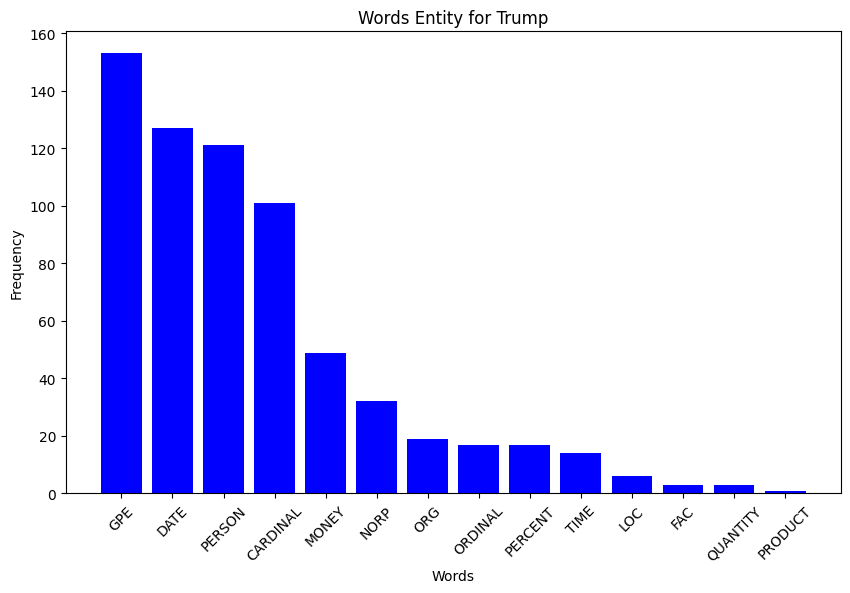

In [502]:
words =  list(entity_t.keys())
frequencies = list(entity_t.values())

top_10 = sorted(zip(words, frequencies), key=lambda x: x[1], reverse=True)

top_words, top_frequencies = zip(*top_10)

plt.figure(figsize=(10, 6))
plt.bar(top_words, top_frequencies, color='blue')
plt.xlabel('Words')  
plt.ylabel('Frequency') 
plt.title('Words Entity for Trump')  
plt.xticks(rotation=45) 

plt.show()

In [503]:
bde = get_name_entity(biden_debate12)
entity_b = Counter(bde)
entity_b

Counter({'CARDINAL': 123,
         'GPE': 94,
         'NORP': 68,
         'DATE': 57,
         'PERSON': 40,
         'ORG': 36,
         'MONEY': 32,
         'ORDINAL': 18,
         'PERCENT': 14,
         'TIME': 12,
         'LOC': 6})

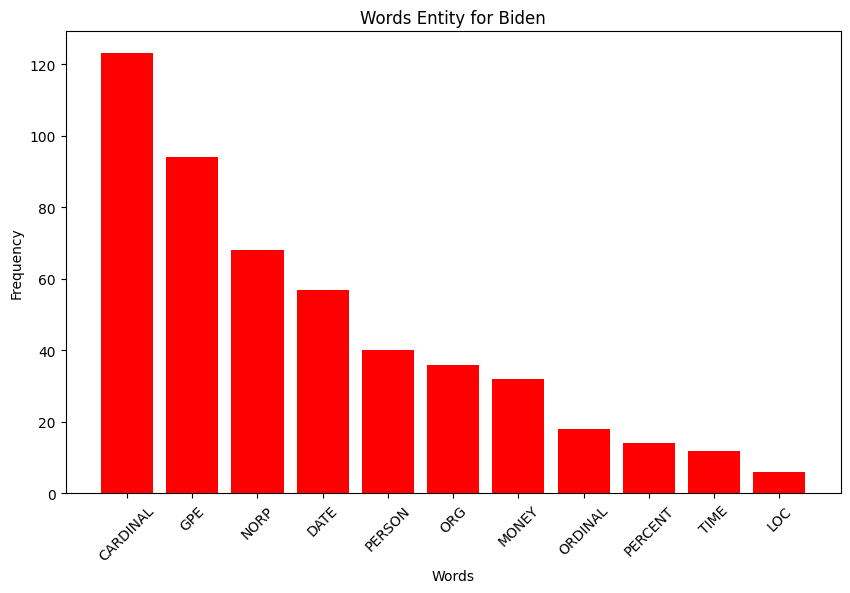

In [504]:
words =  list(entity_b.keys())
frequencies = list(entity_b.values())

top_10 = sorted(zip(words, frequencies), key=lambda x: x[1], reverse=True)

top_words, top_frequencies = zip(*top_10)

plt.figure(figsize=(10, 6))
plt.bar(top_words, top_frequencies, color='red')
plt.xlabel('Words')  
plt.ylabel('Frequency') 
plt.title('Words Entity for Biden')  
plt.xticks(rotation=45) 

plt.show()

**Donald Trump's Top Entities:**

- The most frequent entity type associated with Trump is `GPE` (Geopolitical Entity), which suggests that he often mentioned countries, cities, states, or other locations during the debate. This could be related to discussions on foreign policy, trade, or other location-specific issues.
- The next most common entities are `DATE` and `PERSON`, which indicate references to specific times and individuals. This could be linked to historical references or discussions about specific people.
- Lesser frequent entities like `MONEY` and `NORP` (Nationalities or Religious or Political groups) might relate to economic discussions or political groupings.

**Joe Biden's Top Entities:**

- Biden's most frequent entity is `CARDINAL`, which are numerical entities that do not fall under another type. This suggests he may have used a lot of numbers during the debate, possibly related to statistics or specific figures in his arguments.
- Similar to Trump, `GPE` is also highly mentioned, although less than `CARDINAL`, indicating that Biden also focused on geographical-related issues but perhaps with less frequency than Trump.
- `NORP` is quite significant in Biden's speech as well, which might imply discussions about specific nationalities, cultures, or political entities.

**Comparative Analysis:**

- Both candidates have `GPE` and `NORP` in their top entities, although the order differs, reflecting that both discussed location-specific and group-specific issues.
- Trump's entities suggest a strong focus on specific people (`PERSON`) and time points (`DATE`), which may indicate a more anecdotal or narrative style.
- Biden's use of `CARDINAL` numbers suggests a focus on data, figures, and statistics, which could reflect a strategy of substantiating his points with quantitative information.
- The presence of entities like `MONEY` and `ORDINAL` in both charts indicates economic topics and discussions about order or position were likely covered by both candidates.
- It’s notable that `ORG` (Organizations) appear in the top entities for Biden but not for Trump, suggesting Biden may have referred more to institutions, companies, or formal groups during the debate.


## 6. Generate a word cloud for Trump's town hall (use only Trump's words) and one for Biden's town hall (again, use only Biden's words).  Compare and contrast the two word clouds.

Install a word cloud generating package like the one from https://github.com/amueller/word_cloud

In [509]:
from wordcloud import WordCloud

In [510]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [511]:
trump_debate = trump_first_debate_clean + trump_second_debate_clean
biden_debate = biden_first_debate_clean + biden_second_debate_clean

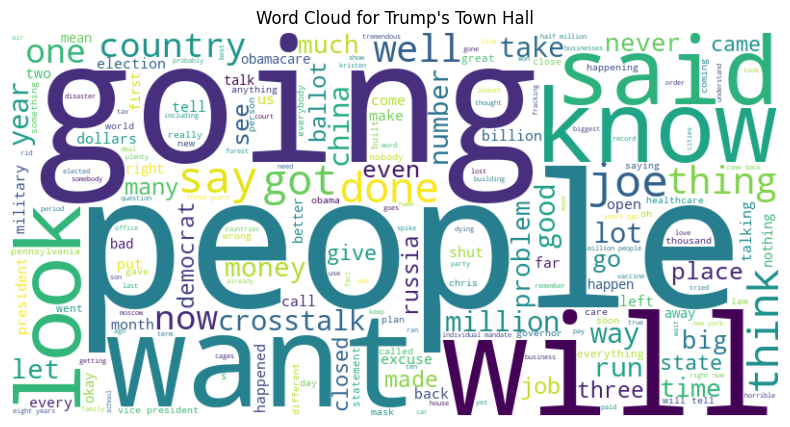

In [512]:

generate_word_cloud(trump_debate, "Word Cloud for Trump's Town Hall")


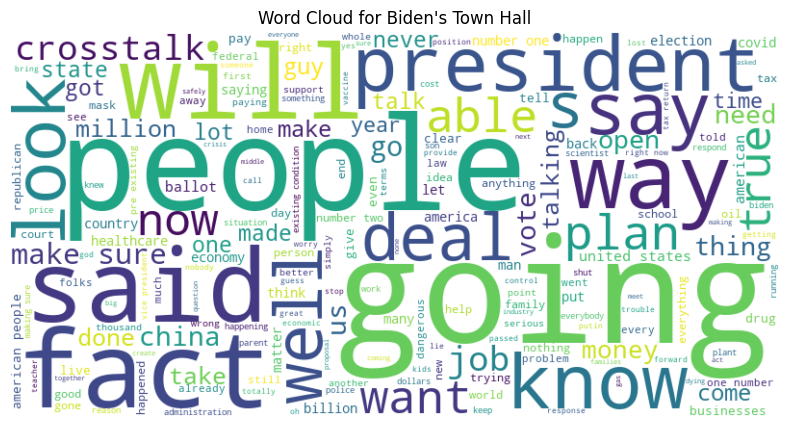

In [513]:

generate_word_cloud(biden_debate, "Word Cloud for Biden's Town Hall")

**Trump's Word Cloud**: The word "people" stands out significantly, which suggests a focus on discussing groups or the general population. Words like "going", "want", "know", and "get" indicate active language, possibly reflecting a focus on actions and desires. 

**Biden's Word Cloud**: Biden's word cloud is dominated by "plan", "president", and "people", pointing to discussions about his plans and policies as well as a focus on addressing people's issues. There is also a prominent display of words like "going", "make", "know", and "need", suggesting a forward-looking and action-oriented discourse.

**Comparison**:
   - Both candidates frequently use the word "people", "going", "will", "said". 
   - Trump's cloud has a variety of action verbs like "know", "want".
   - Biden's cloud includes terms like "fact".

## 7. Sentiment analysis of Trump vs. Biden in second debate

Note that you will want to review the video on Sentiment Analysis with NLTK and spaCy from the pre-recorded lectures.

Perform a sentiment analysis that compares the sentiment of the two candidates (Trump & Biden) in the second debate.  

There are several ways to do this.  In its simplest form, you could determine the sentiment for each utterance, the perform some mathematical summary (sum, mean, etc.) A slightly more elegant solution would involve tracking how sentiment changes over the course of the debate for each of the candidates.  A further extension of your work might use the [pandas.DataFrame.rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) method to calculate rolling averages, although using that function will probably require you to also learn about [time functions in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

No matter what approach you choose, you should be sure to use visualizations in your answer.  As always, provide an interpretation of your results, including any visualizations (i.e. don't just provide a visualization, explain what's interesting that you see in your visualizations).

In [522]:
import nltk
from textblob import TextBlob

In [523]:
second_debate['text_clean']

0      good evening  everyone  good evening  thank yo...
1                        how are you doing  how are you 
2      and i do want to say a very good evening to bo...
3      the goal is for you to hear each other and for...
4        during this next stage of the coronavirus cr...
                             ...                        
507    all right  vice president biden  same question...
508    i will say  i am an american president  i repr...
509    we can grow this economy  we can deal with the...
510    all right  i want to thank you both for a very...
511                                           thank you 
Name: text_clean, Length: 512, dtype: object

In [524]:
nltk.download('vader_lexicon') 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_scores(docx):
    return sent_analyzer.polarity_scores(docx.text)

from spacy.tokens import Doc
Doc.set_extension("sentimenter",getter=sentiment_scores,force=True)
trump_2['sentiment_rating'] = trump_2['text'].apply(lambda x: nlp(x)._.sentimenter['compound'])
biden_2['sentiment_rating'] = biden_2['text'].apply(lambda x: nlp(x)._.sentimenter['compound'])



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/an/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_12715/2718079408.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_2['sentiment_rating'] = trump_2['text'].apply(lambda x: nlp(x)._.sentimenter['compound'])
/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_12715/2718079408.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_2['sentiment_rating'] = biden_2['text'].apply(lambda x: nlp(x)._.sentimenter['compound'])


In [527]:
trump_2['time'] = pd.to_timedelta('00:' + trump_2['minute'].astype(str))
biden_2['time'] = pd.to_timedelta('00:' + biden_2['minute'].astype(str))

trump_2.set_index('time', inplace=True)
biden_2.set_index('time', inplace=True)

trump_2.sort_index(inplace=True)
biden_2.sort_index(inplace=True)

/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_12715/2877268492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_2['time'] = pd.to_timedelta('00:' + trump_2['minute'].astype(str))
/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_12715/2877268492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_2['time'] = pd.to_timedelta('00:' + biden_2['minute'].astype(str))


/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_12715/1111504020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_2['rolling_avg_sentiment'] = trump_2['sentiment_rating'].rolling('5T').mean()
/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_12715/1111504020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_2['rolling_avg_sentiment'] = biden_2['sentiment_rating'].rolling('5T').mean()
/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_12715/1111504020.py:7: Settin

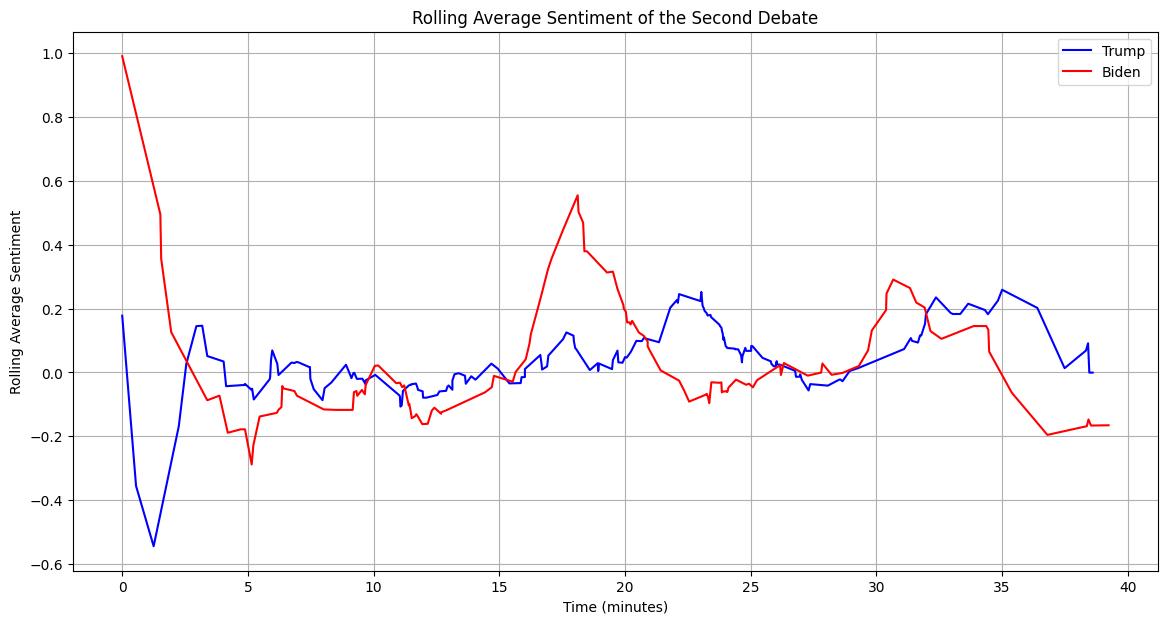

In [528]:
trump_2['rolling_avg_sentiment'] = trump_2['sentiment_rating'].rolling('5T').mean()
biden_2['rolling_avg_sentiment'] = biden_2['sentiment_rating'].rolling('5T').mean()

trump_2.reset_index(inplace=True)
biden_2.reset_index(inplace=True)

trump_2['time_minutes'] = trump_2['time'].dt.total_seconds() / 60.0
biden_2['time_minutes'] = biden_2['time'].dt.total_seconds() / 60.0

plt.figure(figsize=(14, 7))
plt.plot(trump_2['time_minutes'], trump_2['rolling_avg_sentiment'], label='Trump', color='blue')
plt.plot(biden_2['time_minutes'], biden_2['rolling_avg_sentiment'], label='Biden', color='red')

plt.title('Rolling Average Sentiment of the Second Debate')
plt.xlabel('Time (minutes)')
plt.ylabel('Rolling Average Sentiment')
plt.legend()
plt.grid(True)
plt.show()

**Initial Sentiment**: The debate opens with a distinct difference in sentiment; Biden’s lines trend positive, suggesting an optimistic or affirmative starting tone in his remarks. Conversely, Trump begins with a sentiment that hovers around neutral or dips into the negative, which could reflect a more critical or defensive stance.

**Volatility**: The sentiment lines for both candidates undulate, displaying a series of peaks and troughs as the debate progresses. This variability indicates shifting emotional tones, reflecting the interactive and dynamic nature of a debate where responses might swing from positive to negative based on the topics discussed and the candidates’ reactions to each other's statements.

**Comparative Sentiment Stability**: Trump’s sentiment line, while fluctuating, tends to remain within a narrower range, suggesting a degree of consistency in the emotional tone of his communication. On the other hand, Biden’s wider sentiment fluctuations hint at a more varied tonal range in his speech throughout the debate.

# Please submit your notebook in .IPYNB and .HTML formats

We **strongly** suggest running all cells from top to bottom before you submit your notebook.